# Forward Curve Notebook

## Data retrieving

In [85]:
# import des libs
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
import re
import os
from os import *
from os.path import *
import xlwings as xw
from xlwings import Range 
import warnings
warnings.filterwarnings('ignore')

In [86]:
data = pd.read_csv(r"W:\UK\Trading_Public\FrontOffice\Trading Marks\Power\ExportforMiddle 12-08-22.csv", decimal="." , thousands=',' ,  index_col = False)
data.dropna(inplace = True)
data

,Unnamed: 0,Maturity,ELEC_DE.B,ELEC_DE.P,ELEC_DE.O,ELEC_FR.B,ELEC_FR.P,ELEC_FR.O,ELEC_UK.B,ELEC_UK.P,...,ELEC_NO.O,ELEC_ES.B,ELEC_ES.P,ELEC_ES.O,ELEC_IT.B,ELEC_IT.P,ELEC_IT.O,ELEC_CH.B,ELEC_CH.P,ELEC_CH.O
0,DLI,13/08/2022,377.75,339.70,377.75,396.94,378.09,396.94,311.19,296.15,...,226.10,152.32,136.96,152.32,446.85,425.35,446.85,397.68,397.68,397.68
1,DL1,13/08/2022,377.75,339.70,377.75,396.94,378.09,396.94,311.19,296.15,...,226.10,152.32,136.96,152.32,446.85,425.35,446.85,397.68,397.68,397.68
3,DL3,15/08/2022,388.44,425.00,351.89,392.78,420.00,365.56,325.68,328.06,...,180.00,137.10,144.45,129.75,492.22,542.00,442.44,405.10,447.47,362.74
4,DL4,16/08/2022,388.44,425.00,351.89,392.78,420.00,365.56,325.68,328.06,...,180.00,137.10,144.45,129.75,492.22,542.00,442.44,405.10,447.47,362.74
5,DL5,17/08/2022,388.44,425.00,351.89,392.78,420.00,365.56,325.68,328.06,...,180.00,137.10,144.45,129.75,492.22,542.00,442.44,405.10,447.47,362.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,6YR,Cal 28,136.20,156.63,124.95,161.20,242.34,116.51,142.42,185.15,...,0.00,46.75,47.18,46.51,133.05,147.67,125.00,167.89,193.04,153.99
209,7YR,Cal 29,128.55,147.83,117.82,145.30,205.60,111.74,138.42,179.95,...,0.00,44.54,44.37,44.64,131.05,144.16,123.76,160.24,184.06,146.69
210,8YR,Cal 30,127.15,146.22,116.54,142.15,188.59,116.31,138.17,172.72,...,0.00,42.79,42.21,43.11,129.70,142.67,122.48,158.84,182.73,145.63
211,9YR,Cal 31,125.75,144.61,115.25,137.75,170.58,119.48,137.92,165.51,...,0.00,41.94,41.03,42.45,129.50,142.45,122.29,157.44,181.12,144.35


In [87]:
data_fr  = data.loc[: , ["Maturity", "ELEC_FR.B"]]
data_fr.set_index(data["Maturity"], inplace = True)
data_fr.drop(["Maturity"], axis = 1,  inplace =  True)
data_fr['ELEC_FR.B'] = pd.to_numeric(data_fr['ELEC_FR.B'])

data_fr

,ELEC_FR.B
Maturity,
13/08/2022,396.94
13/08/2022,396.94
15/08/2022,392.78
16/08/2022,392.78
17/08/2022,392.78
...,...
Cal 28,161.20
Cal 29,145.30
Cal 30,142.15


In [88]:
data_fr_quarters = data_fr[data_fr.index.str.contains("Q")]
data_fr_quarters["+ std"] = data_fr_quarters["ELEC_FR.B"] + 20
data_fr_quarters["- std"] = data_fr_quarters["ELEC_FR.B"] - 20

''

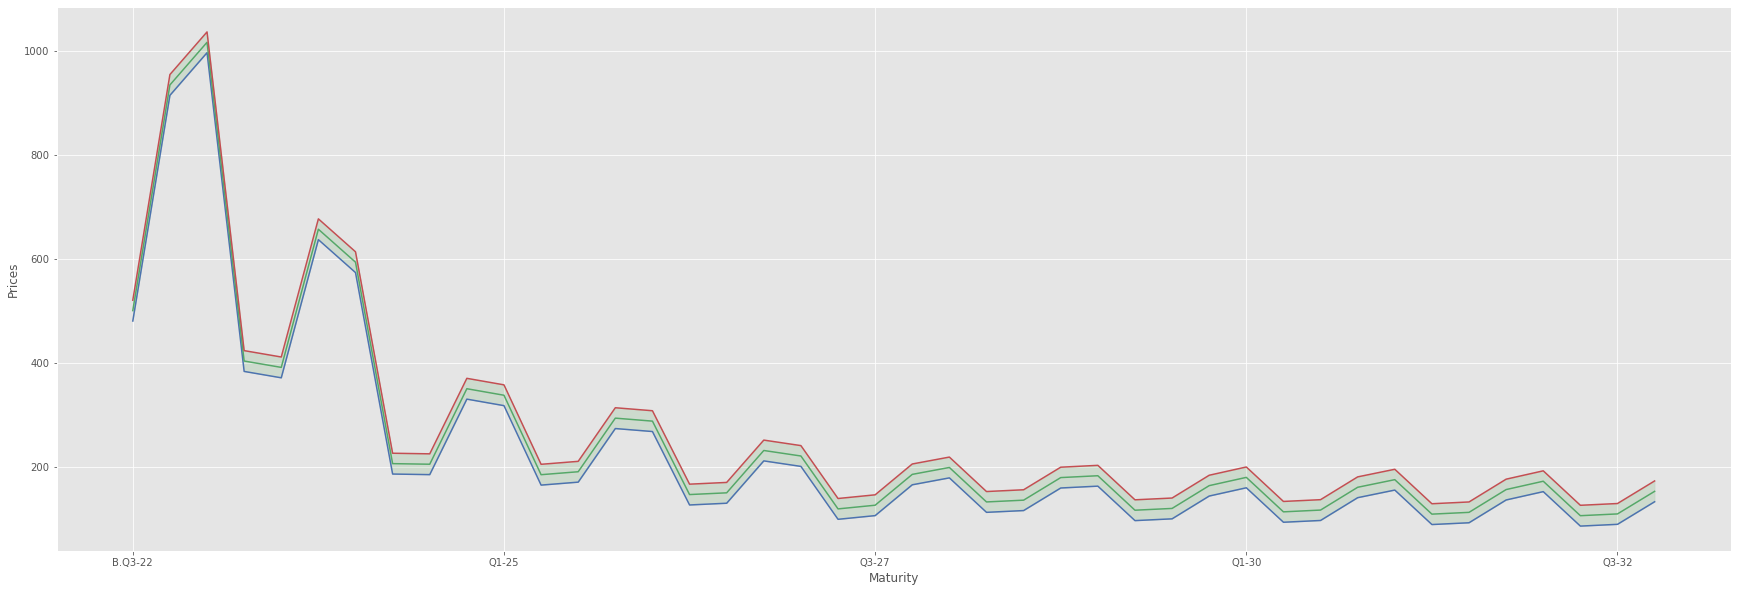

In [89]:
plt.figure(figsize=(30, 10))
plt.xlabel('Maturity')
plt.ylabel('Prices')
data_fr_quarters["- std"].plot()
data_fr_quarters["ELEC_FR.B"].plot()
data_fr_quarters["+ std"].plot()
plt.fill_between(data_fr_quarters.index, data_fr_quarters["+ std"], data_fr_quarters["- std"], alpha = 0.1, color = 'g')
;